In [1]:
import numpy as np
import sys
sys.path.append('../')
from cycada.data.data_loader import get_dataset
import PIL.Image as Image
from os.path import join
import os

In [9]:
from torchvision import datasets

mnist_dataset = datasets.MNIST('./mnist/', train=True, transform=None, 
                               target_transform=None, download=True)
svhn_dataset = datasets.SVHN('./svhn/', split='train', transform=None, 
                             target_transform=None, download=True)

Using downloaded and verified file: ./svhn/train_32x32.mat


In [10]:
outdir = './svhn2mnist'
# SVHN->MNIST: convert to 32x32x3 images

os.makedirs(join(outdir, 'trainB/images'), exist_ok=True)
with open(join(outdir, 'trainB/labels.txt'), 'w') as label_file:
    for i in range(len(mnist_dataset)):
        img = Image.fromarray(mnist_dataset.train_data[i].numpy())
        img = img.resize([32,32])
        img = img.convert('RGB')
        img.save(join(outdir, 'trainB/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, mnist_dataset.train_labels[i]))
     

os.makedirs(join(outdir, 'trainA/images'), exist_ok=True)
svhn_labels = svhn_dataset.labels.flatten()
with open(join(outdir, 'trainA/labels.txt'), 'w') as label_file:
    for i in range(len(svhn_dataset)):
        img = Image.fromarray(svhn_dataset.data[i].transpose(1,2,0))
        img.save(join(outdir, 'trainA/images', '{:d}.png'.format(i)))
        label_file.write('{:d} {:d}\n'.format(i, svhn_labels[i]))

In [11]:
# CUDA_VISIBLE_DEVICES=1 python train.py --name experiment_name 
# --dataroot path_to_gta2cityscape --resize_or_crop=crop --loadSize=360 --fineSize=360 --identity 1.0 
# --which_model_netD n_layers --n_layers_D 3

In [12]:
#CUDA_VISIBLE_DEVICES=1 python cyclegan/train.py --name test_svhn2mnist 
# --dataroot /x/jhoffman/cyclegan_data/svhn2mnist/ --resize_or_crop=None 
# --loadSize=32 --fineSize=32 --which_model_netD n_layers --n_layers_D 3 --no_flip
# --model cycle_gan --lambda_A 1 --lambda_B 1 --identity 1.0

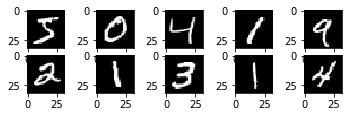

In [20]:
import matplotlib.pyplot as plt
dirname = join(outdir, 'trainB/images')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))

    plt.subplot(5,5,i+1)
    plt.imshow(img)
    #plt.grid('off')
    #plt.axis('off')

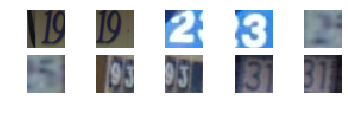

In [19]:
dirname = join(outdir, 'trainA/images')
for i in range(10):
    img = Image.open(join(dirname, '{:d}.png'.format(i)))
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.grid('off')
    plt.axis('off')

In [29]:
y = svhn_dataset.labels
#y.shape
y.squeeze().shape

(73257,)

Text(0.5, 1.0, 'P(Y) for SVHN')

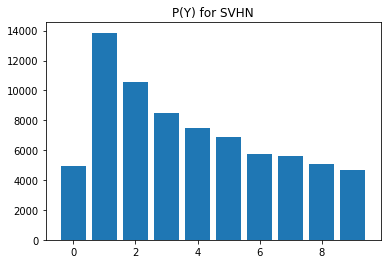

In [30]:
count,bins = np.histogram(y.squeeze(), bins=10)
plt.bar(range(10), count); plt.title('P(Y) for SVHN')

In [31]:
min_num = min(count)
ind = np.zeros((10,min_num), dtype=int)
for i in np.unique(y):
    binary_ind = np.where(y.squeeze() == i)[0]
    np.random.shuffle(binary_ind)
    
    ind[i-1,:] = binary_ind[:min_num]

ind = ind.flatten()
np.random.shuffle(ind)
y_new = y[ind]

Text(0.5, 1.0, 'P(Y) SVHN balanced')

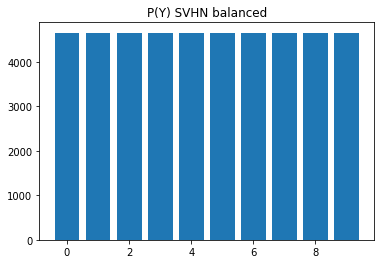

In [32]:
count_new,_ = np.histogram(y_new, bins=10)
plt.bar(range(10), count_new); plt.title('P(Y) SVHN balanced')

In [35]:
with open('./svhn2mnist/trainA/labels.txt', 'r') as f:
    data = f.read().splitlines()

parse = np.array([(int(x.split(' ')[0]), int(x.split(' ')[1])) for x in data])
d = dict(parse)
print (d)

{0: 1, 1: 9, 2: 2, 3: 3, 4: 2, 5: 5, 6: 9, 7: 3, 8: 3, 9: 1, 10: 3, 11: 3, 12: 2, 13: 8, 14: 7, 15: 4, 16: 4, 17: 1, 18: 2, 19: 8, 20: 1, 21: 6, 22: 2, 23: 3, 24: 6, 25: 3, 26: 4, 27: 2, 28: 5, 29: 8, 30: 1, 31: 6, 32: 2, 33: 3, 34: 7, 35: 9, 36: 5, 37: 3, 38: 2, 39: 2, 40: 2, 41: 6, 42: 2, 43: 2, 44: 5, 45: 1, 46: 5, 47: 4, 48: 7, 49: 8, 50: 9, 51: 6, 52: 0, 53: 1, 54: 2, 55: 4, 56: 5, 57: 6, 58: 5, 59: 2, 60: 1, 61: 3, 62: 2, 63: 1, 64: 4, 65: 6, 66: 3, 67: 8, 68: 4, 69: 3, 70: 1, 71: 4, 72: 4, 73: 2, 74: 6, 75: 4, 76: 4, 77: 1, 78: 1, 79: 1, 80: 7, 81: 3, 82: 1, 83: 2, 84: 0, 85: 4, 86: 2, 87: 2, 88: 5, 89: 1, 90: 2, 91: 9, 92: 2, 93: 0, 94: 4, 95: 1, 96: 0, 97: 3, 98: 2, 99: 7, 100: 2, 101: 4, 102: 4, 103: 6, 104: 8, 105: 1, 106: 7, 107: 1, 108: 0, 109: 3, 110: 9, 111: 1, 112: 3, 113: 5, 114: 9, 115: 3, 116: 1, 117: 1, 118: 1, 119: 1, 120: 3, 121: 7, 122: 5, 123: 6, 124: 2, 125: 1, 126: 5, 127: 1, 128: 1, 129: 2, 130: 4, 131: 7, 132: 5, 133: 3, 134: 2, 135: 4, 136: 3, 137: 2, 138: 